In [12]:
import numpy as np
maze= np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1], 
                [1, 2, 2, 2, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1], 
                [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1], 
                [1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1], 
                [1, 2, 0, 1, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1], 
                [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1],
                [1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 0, 1], 
                [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1], 
                [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                [1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1], 
                [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1], 
                [1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 1], 
                [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1], 
                [1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1], 
                [1, 0, 0, 0, 4, 0, 0, 1, 0, 0, 3, 0, 0, 1, 1, 1, 1, 2, 2, 1],
                [1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1], 
                [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 3, 0, 0, 3, 0, 1], 
                [1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],np.int32)

#Define start and goal point
start_position = None
goal_position = None
for i in range(len(maze)):
    for j in range(len(maze[i])):
        if maze[i][j] == 4:
            start_position = (i, j)
        elif maze[i][j] == 5:
            goal_position = (i, j)
# Define state space
S = []
for i in range(len(maze)):
    for j in range(len(maze[i])):
        if maze[i][j] != 1:
            S.append((i, j))

# Define action space
A = ["U", "D", "L", "R"]

# Define transition probabilities
p = 0.02
anticipated_p = 1 - p
neighbor_p = p / 3

# Define reward function
def reward(state):
    i, j = state
    cell = maze[i][j]
    if cell == 1:  # wall
        return None
    elif cell == 2 or cell == 3:  # oil or bump
        return -5 if cell == 2 else -10
    elif cell == 5:  # goal
        return 200
    else:  # empty space
        return -1


gamma = 0.95
theta = 0.01

def next_state(state, action):
    if action == "U":
        return (state[0] - 1, state[1])
    elif action == "D":
        return (state[0] + 1, state[1])
    elif action == "L":
        return (state[0], state[1] - 1)
    elif action == "R":
        return (state[0], state[1] + 1)

def action_value(state, action, V):
    next_s = next_state(state, action)
    if next_s in S:
        anticipated_value = anticipated_p * (reward(next_s) + gamma * V[next_s])
        neighbor_value = 0
        for neighbor_action in A:
            if neighbor_action != action:
                neighbor_s = next_state(state, neighbor_action)
                if neighbor_s in S:
                    neighbor_value += neighbor_p * (reward(neighbor_s) + gamma * V[neighbor_s])
        return anticipated_value + neighbor_value
    else:
        return -np.inf

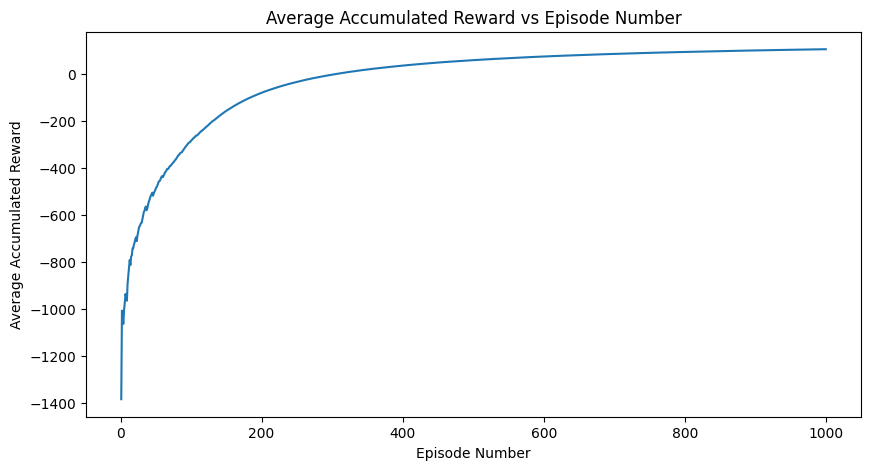

Q values:
(1, 1):
  U: -6.08
  D: -6.86
  L: -6.08
  R: 2.40
(1, 2):
  U: -5.79
  D: -5.80
  L: -5.61
  R: 61.76
(1, 3):
  U: -5.33
  D: 19.41
  L: 9.00
  R: 105.14
(1, 4):
  U: 105.13
  D: 98.85
  L: 98.87
  R: 111.72
(1, 5):
  U: 111.72
  D: 111.71
  L: 105.13
  R: 118.65
(1, 6):
  U: 118.65
  D: 111.63
  L: 111.64
  R: 125.95
(1, 7):
  U: 125.93
  D: 109.99
  L: 118.60
  R: 133.63
(1, 8):
  U: 133.54
  D: 116.94
  L: 125.95
  R: 141.72
(1, 9):
  U: 141.71
  D: 150.23
  L: 133.55
  R: 150.23
(1, 10):
  U: 44.10
  D: 159.19
  L: 71.60
  R: 39.04
(1, 11):
  U: -1.50
  D: 168.53
  L: -0.92
  R: -1.50
(1, 12):
  U: -1.50
  D: 53.34
  L: -1.50
  R: -0.30
(1, 13):
  U: -0.30
  D: -0.30
  L: -1.50
  R: -0.30
(1, 14):
  U: -0.60
  D: 4.28
  L: -0.30
  R: -0.30
(1, 15):
  U: -0.60
  D: -0.74
  L: -0.60
  R: -0.70
(1, 16):
  U: -1.11
  D: -3.00
  L: -1.01
  R: -1.03
(1, 17):
  U: -1.17
  D: -1.28
  L: -1.25
  R: -1.17
(1, 18):
  U: -1.46
  D: -1.52
  L: -1.37
  R: -1.17
(2, 1):
  U: -6.02
  D:

In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt

def epsilon_greedy_policy(state, Q, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(A)
    else:
        return max(A, key=lambda action: Q[(state, action)])

# Initialize Q table
Q = {}
for state in S:
    for action in A:
        Q[(state, action)] = 0

# Set the parameters
epsilon = 0.1
alpha = 0.3
num_episodes = 1000
max_steps = 1000

q_rewards = []
#Q-learning algorithm
for episode in range(num_episodes):
    state = start_position
    step_count = 0
    total_reward = 0

    while state != goal_position and step_count < max_steps:
        action = epsilon_greedy_policy(state, Q, epsilon)
        next_s = next_state(state, action)
        if next_s not in S:
            next_s = state
        
        reward_s_a = reward(next_s)
        total_reward += reward_s_a
        max_next_q = max(Q[(next_s, a)] for a in A)
        Q[(state, action)] += alpha * (reward_s_a + gamma * max_next_q - Q[(state, action)])

        state = next_s
        step_count += 1

    q_rewards.append(total_reward)

average_rewards = [np.mean(q_rewards[:i+1]) for i in range(len(q_rewards))]

# Plot the average accumulated reward with respect to the episode number
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_episodes + 1), average_rewards)
plt.xlabel('Episode Number')
plt.ylabel('Average Accumulated Reward')
plt.title('Average Accumulated Reward vs Episode Number')
plt.show()

print("Q values:")
for state in S:
    print(f"{state}:")
    for action in A:
        print(f"  {action}: {Q[(state, action)]:.2f}")


In [8]:
def get_optimal_policy(Q):
    optimal_policy = {}
    for state in S:
        best_action = max(A, key=lambda action: Q[(state, action)])
        optimal_policy[state] = best_action
    return optimal_policy

def get_optimal_path(optimal_policy, start_position, goal_position):
    optimal_path = []
    state = start_position
    while state != goal_position:
        optimal_path.append(state)
        action = optimal_policy[state]
        state = next_state(state, action)
    optimal_path.append(goal_position)
    return optimal_path

optimal_policy = get_optimal_policy(Q)
optimal_path = get_optimal_path(optimal_policy, start_position, goal_position)

print("Optimal policy:")
for state in S:
    print(f"{state}: {optimal_policy[state]}")

print("Optimal path:")
for state in optimal_path:
    print(state)


Optimal policy:
(1, 1): R
(1, 2): R
(1, 3): R
(1, 4): R
(1, 5): R
(1, 6): R
(1, 7): R
(1, 8): R
(1, 9): D
(1, 10): L
(1, 11): L
(1, 12): D
(1, 13): D
(1, 14): R
(1, 15): D
(1, 16): L
(1, 17): L
(1, 18): R
(2, 1): D
(2, 2): R
(2, 3): U
(2, 4): U
(2, 6): R
(2, 7): D
(2, 8): R
(2, 9): R
(2, 10): D
(2, 11): D
(2, 12): D
(2, 13): D
(2, 14): D
(2, 15): L
(2, 16): L
(2, 17): U
(2, 18): D
(3, 1): R
(3, 2): R
(3, 3): R
(3, 4): U
(3, 6): R
(3, 7): R
(3, 8): R
(3, 9): R
(3, 10): R
(3, 11): R
(3, 12): R
(3, 13): U
(3, 14): L
(3, 15): L
(3, 16): L
(3, 17): L
(3, 18): L
(4, 1): U
(4, 2): U
(4, 17): U
(4, 18): U
(5, 1): U
(5, 2): L
(5, 4): U
(5, 5): U
(5, 6): R
(5, 7): U
(5, 8): D
(5, 9): R
(5, 10): U
(5, 11): U
(5, 12): R
(5, 13): R
(5, 14): R
(5, 15): R
(5, 16): R
(5, 17): U
(5, 18): U
(6, 1): U
(6, 2): U
(6, 4): R
(6, 5): L
(6, 7): L
(6, 8): U
(6, 10): U
(6, 11): L
(6, 12): D
(6, 13): U
(6, 14): U
(6, 16): L
(6, 17): R
(6, 18): U
(7, 1): U
(7, 2): L
(7, 4): R
(7, 5): L
(7, 7): U
(7, 8): R
(7, 10):

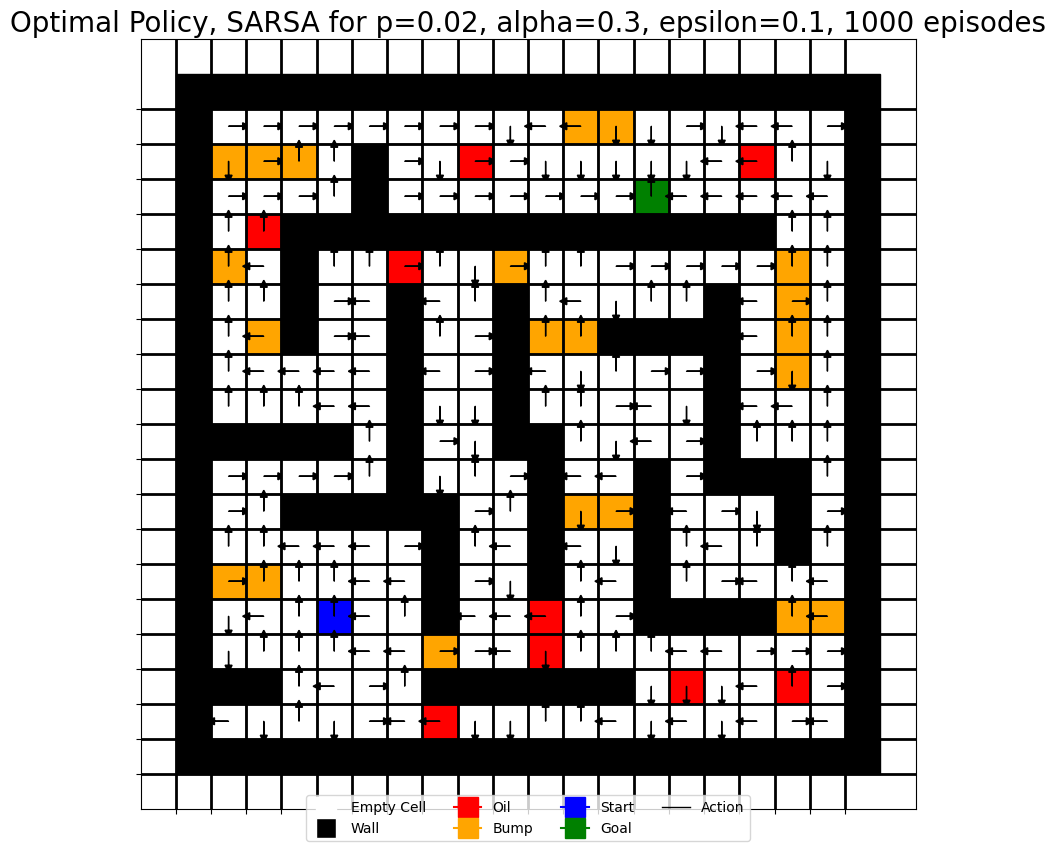

In [9]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

cmap = plt.get_cmap('tab20')
colors = {
    1: 'black',
    2: 'orange',
    3: 'red',
    4: 'blue',
    5: 'green',
    0: 'white'
}

fig, ax = plt.subplots(figsize=(10, 10))

for i in range(len(maze)):
   for j in range(len(maze[i])):
        cell_type = maze[i][j]
        color = colors[cell_type]
        rect = plt.Rectangle((j, len(maze) - i - 1), 1, 1, facecolor=color, edgecolor='black')
        ax.add_patch(rect)
        if cell_type != 1:
            action = optimal_policy[(i, j)]
            
            # Draw arrow
            dx, dy = 0, 0
            if action == "U":
                dy = 0.4
            elif action == "D":
                dy = -0.4
            elif action == "L":
                dx = -0.4
            elif action == "R":
                dx = 0.4
            ax.arrow(j+0.5, len(maze)-i-0.48, dx, dy, head_width=0.2, head_length=0.2, fc='black', ec='black')

ax.set_xticks(np.arange(0, len(maze[0]), 1))
ax.set_yticks(np.arange(0, len(maze), 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True, color='black', linestyle='-', linewidth=2)

legend_elements = [
    Line2D([0], [0], marker='s', color='w', label='Empty Cell', markerfacecolor='white', markersize=15),
    Line2D([0], [0], marker='s', color='w', label='Wall', markerfacecolor='black', markersize=15),
    Line2D([0], [0], marker='s', color='red', label='Oil', markerfacecolor='red', markersize=15),
    Line2D([0], [0], marker='s', color='orange', label='Bump', markerfacecolor='orange', markersize=15),
    Line2D([0], [0], marker='s', color='b', label='Start', markerfacecolor='blue', markersize=15),
    Line2D([0], [0], marker='s', color='g', label='Goal', markerfacecolor='green', markersize=15),
    Line2D([0], [0], color='black', lw=1, label='Action'),
]
ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)
ax.set_title('Optimal Policy, SARSA for p=0.02, alpha=0.3, epsilon=0.1, 1000 episodes', fontsize=20)
plt.show()

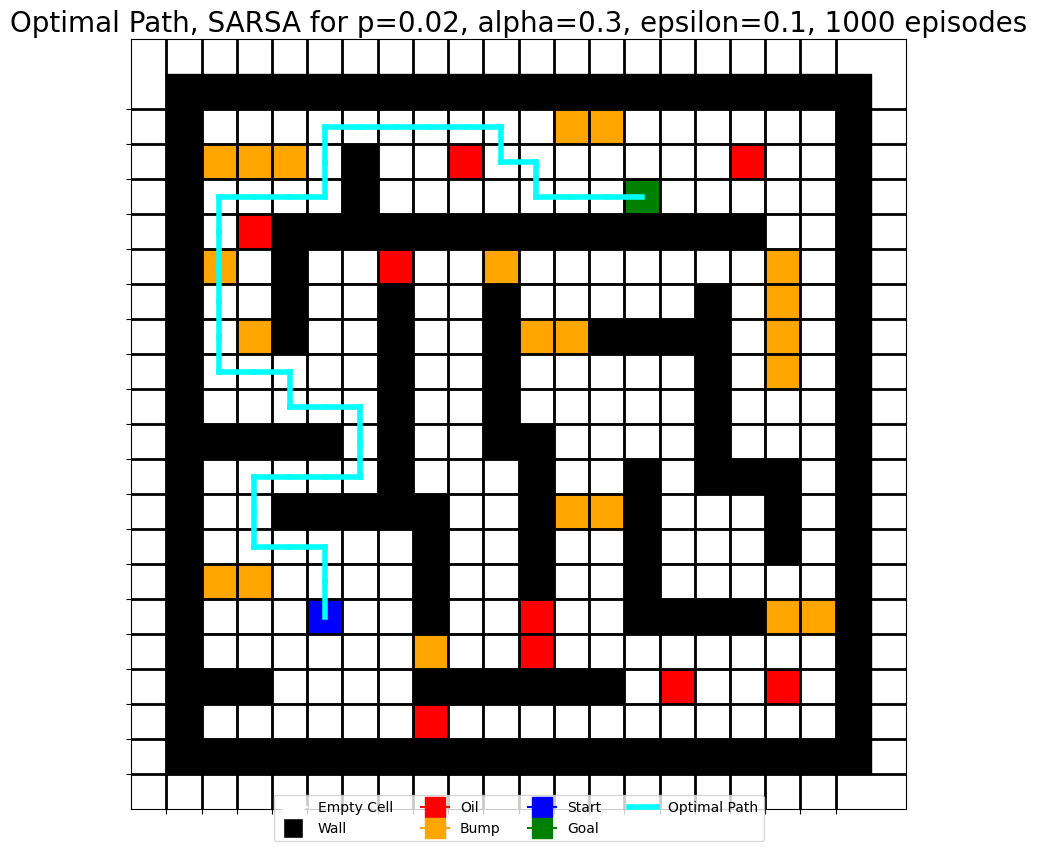

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

for i in range(len(maze)):
   for j in range(len(maze[i])):
        cell_type = maze[i][j]
        color = colors[cell_type]
        rect = plt.Rectangle((j, len(maze) - i - 1), 1, 1, facecolor=color, edgecolor='black')
        ax.add_patch(rect)

# Draw optimal path
for i in range(len(optimal_path) - 1):
    cur_state = optimal_path[i]
    next_state = optimal_path[i + 1]
    plt.plot([cur_state[1] + 0.5, next_state[1] + 0.5], [len(maze) - cur_state[0] - 0.5, len(maze) - next_state[0] - 0.5], 'cyan', linewidth=4)

ax.set_xticks(np.arange(0, len(maze[0]), 1))
ax.set_yticks(np.arange(0, len(maze), 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(True, color='black', linestyle='-', linewidth=2)

legend_elements = [
    Line2D([0], [0], marker='s', color='w', label='Empty Cell', markerfacecolor='white', markersize=15),
    Line2D([0], [0], marker='s', color='w', label='Wall', markerfacecolor='black', markersize=15),
    Line2D([0], [0], marker='s', color='red', label='Oil', markerfacecolor='red', markersize=15),
    Line2D([0], [0], marker='s', color='orange', label='Bump', markerfacecolor='orange', markersize=15),
    Line2D([0], [0], marker='s', color='b', label='Start', markerfacecolor='blue', markersize=15),
    Line2D([0], [0], marker='s', color='g', label='Goal', markerfacecolor='green', markersize=15),
    Line2D([0], [0], color='cyan', lw=4, label='Optimal Path'),
]
ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)
ax.set_title('Optimal Path, SARSA for p=0.02, alpha=0.3, epsilon=0.1, 1000 episodes', fontsize=20)
plt.show()
